##### PRUEBA 1 - Albania
<h1><center>Prueba Simulacion </center></h1>
<h2><center> Universidad "Politecnica Salesiana" </center></h2>
<h5><right>Alumno: Juan Cañar. <br> Docente: Ing. Diego Quisi. </right></h5>

------
Enunciado:

- Diseñe y desarrolle un modelo y/o script que permita simular el siguiente caso real:
- Investigar los datos de los paises contigados por COVID-19, especialmente de latinoamerica (menos Ecuador), deberán escoger uno y que no se repita, para ello se va a seleccionar el orden en el que publique dentro del foro “Tema prueba 1”, con estos datos obtener los siguientes modelos:
- Generar un modelo matematico de prediccion para regresion lineal, exponencial, polinomico y logaritmico, de los nuevos contactos en la proxima semana (7 dias despues).
- Generar un modelo probabilistico con los datos.
- Finalmente, contrarestar los modelos matematicos y generar las siguientes conclusiones
- Cual tiene una mejor prediccion
- Ventajas y desventajas de los modelos.
- Cual es el principal problema del modelo probabilistico
- El proceso de simulación desarrollado deberá considerar los siguientes aspectos:
- Se debe establecer un modelo basado en modelos matematicos y probabilisticos.
- El programa deberá generar gráficas que indiquen la ecuacion matematica y probabilistica de tendencias.
- Deben calcularse las siguientes métricas:
- Total de infectados dentro de 7 dias (matematico y probabilistico).

Finalmente, desarrollar dentor de un cuaderno de Jupyter Notebook, generar un PDF y subir al repositorio.


In [2]:
# Importar las librerias para el analasis
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
#import plotly.graph_objects as go
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline
from xml.dom import minidom

##### Investigar los datos de los paises contigados por COVID-19, especialmente de latinoamerica (menos Ecuador), deberán escoger uno y que no se repita, para ello se va a seleccionar el orden en el que publique dentro del foro “Tema prueba 1”, con estos datos obtener los siguientes modelos:

In [5]:
#url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
df = pd.read_csv(url)
df= df.fillna(1)
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,1.000,1.0,0.0,1.0,...,35973.781,1.0,1.0,11.62,1.0,1.0,1.0,1.0,76.29,1.0
1,ABW,North America,Aruba,2020-03-19,1.0,1.0,0.286,1.0,1.0,0.0,...,35973.781,1.0,1.0,11.62,1.0,1.0,1.0,1.0,76.29,1.0
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,1.0,0.0,0.0,...,35973.781,1.0,1.0,11.62,1.0,1.0,1.0,1.0,76.29,1.0
3,ABW,North America,Aruba,2020-03-21,1.0,1.0,0.286,1.0,1.0,0.0,...,35973.781,1.0,1.0,11.62,1.0,1.0,1.0,1.0,76.29,1.0
4,ABW,North America,Aruba,2020-03-22,1.0,1.0,0.286,1.0,1.0,0.0,...,35973.781,1.0,1.0,11.62,1.0,1.0,1.0,1.0,76.29,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58693,1,1,International,2020-11-19,696.0,1.0,1.000,7.0,1.0,1.0,...,1.000,1.0,1.0,1.00,1.0,1.0,1.0,1.0,1.00,1.0
58694,1,1,International,2020-11-20,696.0,1.0,1.000,7.0,1.0,1.0,...,1.000,1.0,1.0,1.00,1.0,1.0,1.0,1.0,1.00,1.0
58695,1,1,International,2020-11-21,696.0,1.0,1.000,7.0,1.0,1.0,...,1.000,1.0,1.0,1.00,1.0,1.0,1.0,1.0,1.00,1.0
58696,1,1,International,2020-11-22,696.0,1.0,1.000,7.0,1.0,1.0,...,1.000,1.0,1.0,1.00,1.0,1.0,1.0,1.0,1.00,1.0


In [6]:
df = df[df['location'].isin(['Albania'])] #Filtro la Informacion solo para Ecuador
df = df.loc[:,['date','total_cases','iso_code']] #Selecciono las columnas de analasis
# Expresar las fechas en numero de dias desde el 01 Enero
FMT = '%Y-%m-%d'
date = df['date']
df['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2019-12-30", FMT)).days)

df

,date,total_cases,iso_code
1069,70,2.0,ALB
1070,71,6.0,ALB
1071,72,10.0,ALB
1072,73,11.0,ALB
1073,74,23.0,ALB
...,...,...,...
1324,325,29837.0,ALB
1325,326,30623.0,ALB
1326,327,31459.0,ALB
1327,328,32196.0,ALB


## Modelo Lineal

##### Generar un modelo matematico de prediccion para regresion lineal, exponencial, polinomico y logaritmico, de los nuevos contactos en la proxima semana (7 dias despues).

In [7]:
x = list(df.iloc [:, 0]) # Fecha
y = list(df.iloc [:, 1]) # Numero de casos
# Creamos el objeto de Regresión Lineal
regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(np.array(x).reshape(-1, 1) ,y)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio

Coefficients: 
 [97.99424536]
Independent term: 
 -12243.06348842211


In [9]:

#Vamos a comprobar:
# Quiero predecir cuántos "Casos" voy a obtener por en el dia 100,
# según nuestro modelo, hacemos:
y_prediccion = regr.predict([[7]])
# Error Cuadrado Medio
cantidad = int(input("ESCRIBA NUMERO DE DIAS: "))

print('Para el dia',cantidad ,'hay estos casos: ',int(-(y_prediccion)))

ESCRIBA NUMERO DE DIAS: 7
Para el dia 7 hay estos casos:  11557


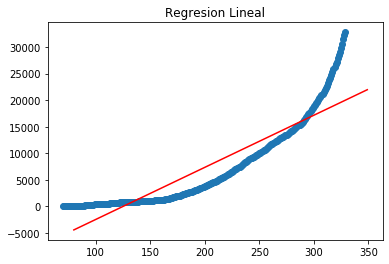

In [10]:
plt.scatter(x, y)
x_real = np.array(range(80, 350))
#print(x_real)
plt.title('Regresion Lineal')
plt.plot(x_real, regr.predict(x_real.reshape(-1, 1)), color='red')
plt.show()

## Modelo Exponencial

In [11]:
curve_fit = np.polyfit((x),np.log(y), deg=1)
print(curve_fit)

[0.02282691 3.3464711 ]


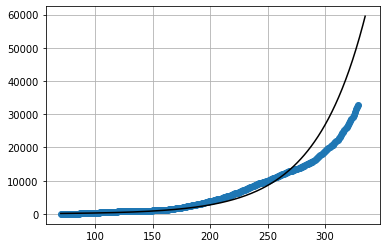

In [23]:
pred_x = np.array(list(range(min(x),max(x)+7)))
yx = np.exp(curve_fit[1]) * np.exp(curve_fit[0]*pred_x)
plt.plot(x,y,'o')
plt.plot(pred_x,yx,color="black")
plt.grid(True)


In [30]:
print('Total de infectados en 7 dias: ',sum(curve_fit[0]*yx))

Total de infectados en 7 dias:  60028.15041998351


## Modelo Polinomial

----------------RESPUESTA OBTENIDA en 7 DIAS------------
PREDICCION: 3732.0 contagiados


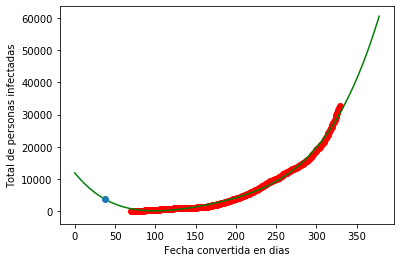

In [33]:
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 

pf = PolynomialFeatures(degree = 4)
X = pf.fit_transform(np.array(x).reshape(-1, 1))
regresion_lineal = LinearRegression()
regresion_lineal.fit(X, y) 
pred_x = list(range(0,max(x)+50))

puntos = pf.fit_transform(np.array(pred_x).reshape(-1, 1))
prediccion_entrenamiento = regresion_lineal.predict(puntos)
respuesta =  round((prediccion_entrenamiento[37]))
print('----------------RESPUESTA OBTENIDA en 7 DIAS------------')
print ('PREDICCION:',respuesta, 'contagiados')
plt.plot(pred_x, prediccion_entrenamiento, color='green')
plt.scatter(x,y,label="Datos Reales",color="red")
plt.xlabel("Fecha convertida en dias")
plt.ylabel("Total de personas infectadas")
plt.plot(37,prediccion_entrenamiento[37], 'o')
plt.show()

## Modelo Logaritmico

In [8]:
def modelo_logistico(x,a,b):
    res= a+b*np.log(x)
    return res

exp_fit = curve_fit(modelo_logistico,x,y) #Extraemos los valores de los paramatros
print(exp_fit)

(array([-74526.80741631,  15696.25170277]), array([[12734864.45539686, -2426606.56646353],
       [-2426606.56646353,   465439.98110178]]))


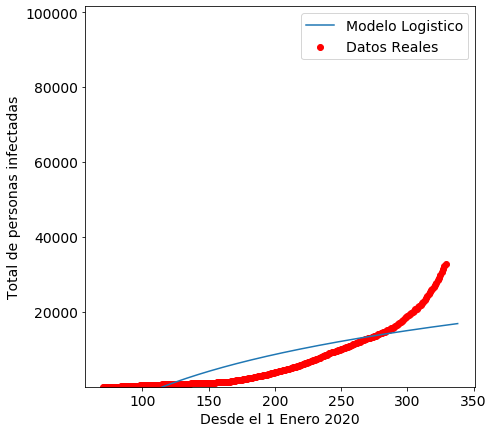

Contagios en 7 dias:  [16873.186635974707]


In [10]:
pred_x = list(range(min(x),max(x)+10)) # Predecir 50 dias mas
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
# Real data
plt.scatter(x,y,label="Datos Reales",color="red")
# Predicted exponential curve
plt.plot(pred_x, [modelo_logistico(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x], label="Modelo Logistico" )
plt.legend()
plt.xlabel("Desde el 1 Enero 2020")
plt.ylabel("Total de personas infectadas")
plt.ylim((min(y)*0.9,max(y)*3.1)) # Definir los limites de Y
plt.show()
print("Contagios en 7 dias: ",[modelo_logistico(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x][-1:])

## Generar un modelo probabilistico con los datos.

In [14]:
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
df = pd.read_csv(url)
df= df.fillna(1)
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,1.000,1.0,0.0,1.0,...,35973.781,1.0,1.0,11.62,1.0,1.0,1.0,1.0,76.29,1.0
1,ABW,North America,Aruba,2020-03-19,1.0,1.0,0.286,1.0,1.0,0.0,...,35973.781,1.0,1.0,11.62,1.0,1.0,1.0,1.0,76.29,1.0
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,1.0,0.0,0.0,...,35973.781,1.0,1.0,11.62,1.0,1.0,1.0,1.0,76.29,1.0
3,ABW,North America,Aruba,2020-03-21,1.0,1.0,0.286,1.0,1.0,0.0,...,35973.781,1.0,1.0,11.62,1.0,1.0,1.0,1.0,76.29,1.0
4,ABW,North America,Aruba,2020-03-22,1.0,1.0,0.286,1.0,1.0,0.0,...,35973.781,1.0,1.0,11.62,1.0,1.0,1.0,1.0,76.29,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58693,1,1,International,2020-11-19,696.0,1.0,1.000,7.0,1.0,1.0,...,1.000,1.0,1.0,1.00,1.0,1.0,1.0,1.0,1.00,1.0
58694,1,1,International,2020-11-20,696.0,1.0,1.000,7.0,1.0,1.0,...,1.000,1.0,1.0,1.00,1.0,1.0,1.0,1.0,1.00,1.0
58695,1,1,International,2020-11-21,696.0,1.0,1.000,7.0,1.0,1.0,...,1.000,1.0,1.0,1.00,1.0,1.0,1.0,1.0,1.00,1.0
58696,1,1,International,2020-11-22,696.0,1.0,1.000,7.0,1.0,1.0,...,1.000,1.0,1.0,1.00,1.0,1.0,1.0,1.0,1.00,1.0


In [20]:
df = df[df['location'].isin(['Albania'])] #Filtro la Informacion solo para Ecuador
df = df.loc[:,['date','total_cases','iso_code']] #Selecciono las columnas de analasis
# Expresar las fechas en numero de dias desde el 01 Enero
FMT = '%Y-%m-%d'
date = df['date']
df['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2019-12-30", FMT)).days)

df

,date,total_cases,iso_code
1069,70,2.0,ALB
1070,71,6.0,ALB
1071,72,10.0,ALB
1072,73,11.0,ALB
1073,74,23.0,ALB
...,...,...,...
1324,325,29837.0,ALB
1325,326,30623.0,ALB
1326,327,31459.0,ALB
1327,328,32196.0,ALB


In [24]:
filtro = df['total_cases']# Filtro los datos que se empezo a tener casos
#Obtenemos la mediana
media = filtro.mean()
mediana = filtro.median()
print('MEDIANA : -->',mediana)
print('MEDIA : -->',media)

MEDIANA : --> 3801.5
MEDIA : --> 7306.788461538462


In [26]:
y = list(df.iloc [:, 1]) # Total casos
x = list(df.iloc [:, 0]) # Dias
#Realizamos un ejemplo de prediccion
prediccion_siguiente = int(y[-1] + mediana)
print(prediccion_siguiente)

36562


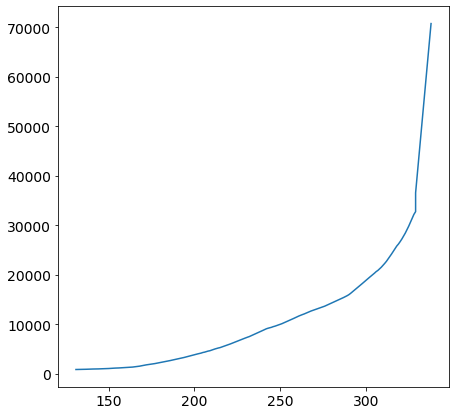

In [27]:
for i in range(x[-1], x[-1]+10):
    x.append(i)
    y.append(int(y[-1] + mediana))
plt.plot(x[61:], y[61:])
plt.show()

In [32]:
prediccion_siguiente = int(y[-1] + mediana)
print('________________________________________________')
print('---------MODELO PROBABILISTICO---------')
print('TOTAL DE CASOS + MEDIANA: ',prediccion_siguiente)
print('TOT, FECHA ACTUAL: ',y[120])
for i in range(x[-1], x[-1]+7):
    x.append(i)
    y.append(int(y[-1] + mediana))
print('________________________________________________')
print('SE ESTIMA PARA LA SEMANA SIGUIENTE:',y[-1]+7, 'CONTAGIOS ')#Se suma 7 dias

________________________________________________
---------MODELO PROBABILISTICO---------
TOTAL DE CASOS + MEDIANA:  154393
TOT, FECHA ACTUAL:  2964.0
________________________________________________
SE ESTIMA PARA LA SEMANA SIGUIENTE: 177206 CONTAGIOS 


----
## Cual tiene una mejor prediccion
Como se observa el modelo polinomial es el que tienen un mejor precisión segun la simulacion dentro los 7 dias.

* Modelo Polinomial con : Total infectados => 3732.0 contagiados en 7 dias.

## Ventajas y desventajas de los modelos.

##### Lineal:
* Nos permiten predecir como va creciento la tasa de contagiados.
* Permiten una identificación rápida de las expectativas esperadas.
* Desventajas: pero no modela ecuaciones con grados.

##### Exponencial:
* Es una ecuacion exponencial y genera una grafica en forma de curva, este ayuda a representar en cierto grado, con que fuerza se propagaria el virus.
* Desventaja: Depende del grado de precision, ya que influye la poblacion inicial, tasa de crecimento, unidades de tiempo.

##### Polinomial:
* Es un modelo que permite acercarse mas a datos reales, ya que es una ecuacion de grado n
* Desventaja: Depende del grado de presicion, entre mayor es el grado mas se ajusta a la curva, pero los datos se expanden y pierde datos o es propensa a fallar.

##### Logaritmico:
* Ventajas: Es muy eficaz y simple Los resultados son faciles de interpretar. 
* Desventajas: No resuelve problemas no lineales


### Cual es el principal problema del modelo probabilistico

Cuando los valores son pequeños, este realiza los calculos de prediccion de manera correcta y oportuna, pero al momento de trabajar con datos historicos grandes, este tiende a fallar y su prediccion es erronea.

###### El programa deberá generar gráficas que indiquen la ecuacion matematica y probabilistica de tendencias.
Deben calcularse las siguientes métricas:
Total de infectados dentro de 7 dias (matematico y probabilistico).

MEDIANA : --> 3801.5
MEDIA : --> 7306.788461538462
36562


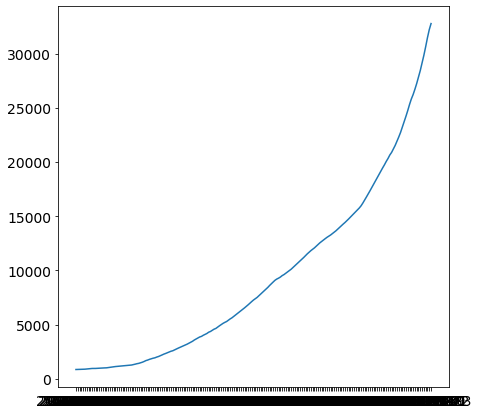

In [42]:
filtro = df['total_cases']# Filtro los datos que se empezo a tener casos
#Obtenemos la mediana
media = filtro.mean()
mediana = filtro.median()
print('MEDIANA : -->',mediana)
print('MEDIA : -->',media)
y = list(df.iloc [:, 1]) # Total casos
x = list(df.iloc [:, 0]) # Dias
#Realizamos un ejemplo de prediccion
prediccion_siguiente = int(y[-1] + mediana)
print(prediccion_siguiente)
plt.plot(x[61:], y[61:])
plt.show()